In [1]:
# !pip install open3d
# !pip install ipywidgets

demo_path = "/home/tlips/bc_data/demo-remko/gello"
import os 

demos = os.listdir(demo_path)
print(demos)
demo = "0611_170513"

['0611_164910', '0611_170513', '0611_105339', '0611_105354', '0611_170050']


In [2]:
pickles = os.listdir(os.path.join(demo_path, demo))
# order by time
pickles.sort()

print(pickles)

pickle_path = pickles[0]

['2024-06-11T17:05:14.093297.pkl', '2024-06-11T17:05:14.195390.pkl', '2024-06-11T17:05:14.293080.pkl', '2024-06-11T17:05:14.395715.pkl', '2024-06-11T17:05:14.492115.pkl', '2024-06-11T17:05:14.595741.pkl', '2024-06-11T17:05:14.695187.pkl', '2024-06-11T17:05:14.795455.pkl', '2024-06-11T17:05:14.893888.pkl', '2024-06-11T17:05:14.967632.pkl', '2024-06-11T17:05:15.096349.pkl', '2024-06-11T17:05:15.192933.pkl', '2024-06-11T17:05:15.294365.pkl', '2024-06-11T17:05:15.397676.pkl', '2024-06-11T17:05:15.497422.pkl', '2024-06-11T17:05:15.601463.pkl', '2024-06-11T17:05:15.695141.pkl', '2024-06-11T17:05:15.797783.pkl', '2024-06-11T17:05:15.899553.pkl', '2024-06-11T17:05:16.002672.pkl', '2024-06-11T17:05:16.130375.pkl', '2024-06-11T17:05:16.210571.pkl', '2024-06-11T17:05:16.310605.pkl', '2024-06-11T17:05:16.410684.pkl', '2024-06-11T17:05:16.510519.pkl', '2024-06-11T17:05:16.631578.pkl', '2024-06-11T17:05:16.731518.pkl', '2024-06-11T17:05:16.831587.pkl', '2024-06-11T17:05:16.931161.pkl', '2024-06-11T1

In [3]:
import pickle

obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))

In [4]:
print(obs.keys())
# for k,v in obs.items():
#     print(k)
#     print(v)

dict_keys(['wrist_rgb', 'wrist_depth', 'base_rgb', 'base_depth', 'joint_positions', 'tcp_pose_rotvec', 'wrench', 'fingertips', 'accelerometer', 'gripper_position', 'control'])


In [5]:
positions = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    pose = obs["tcp_pose_rotvec"]
    position = pose[:3]
    positions.append(position)

In [6]:
import open3d 

# jet color scheme 
import cv2
import numpy as np

# visualize the positions
pcd = open3d.geometry.PointCloud()
# encode the colors using the spectral color scheme according to time

pcd.points = open3d.utility.Vector3dVector(positions)
colors = []
for i in range(len(positions)):
    color = cv2.applyColorMap(np.array(i/len(positions)*255,dtype=np.uint8), cv2.COLORMAP_CIVIDIS)
    colors.append(color[0][0]/255)



pcd.colors = open3d.utility.Vector3dVector(colors)

# add a coordinate frame of the robot
frame = open3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0,0,0])

open3d.visualization.draw_geometries([pcd, frame])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [7]:
# get the wrist camera images and display them 
import cv2
import numpy as np
import matplotlib.pyplot as plt

wrist_images = []
base_images = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    img = obs["wrist_rgb"]
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.uint8)
    wrist_images.append(img)

    img = obs["base_rgb"]
    img = img.astype(np.uint8)
    base_images.append(img)

# create ipywidget slider to display the  numpy array images
import ipywidgets as widgets
from IPython.display import display
slider = widgets.IntSlider(min=0, max=len(wrist_images)-1)

def view_image(i):
    wrist_img = wrist_images[i]
    base_img = base_images[i]
    
    # display the image
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(wrist_img)
    ax[1].imshow(base_img)
    plt.show()

image_widget = widgets.interactive(view_image, i=slider)
display(image_widget)


interactive(children=(IntSlider(value=0, description='i', max=366), Output()), _dom_classes=('widget-interact'…

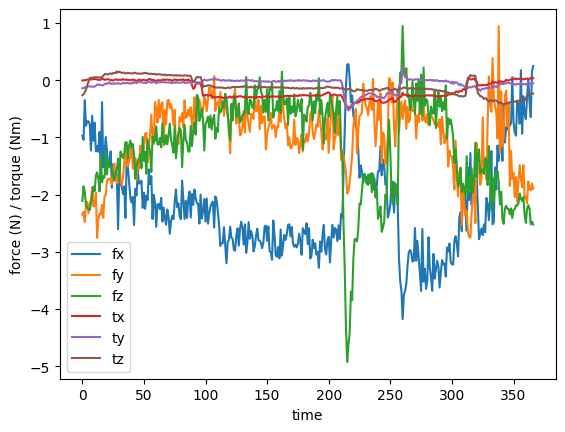

In [9]:
# visualize the FT wrench timeseries

ft_wrench = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    ft = obs["wrench"]
    ft_wrench.append(ft)


ft_wrench = np.array(ft_wrench)

# plot the timeseries
plt.plot(ft_wrench)
plt.xlabel("time")
plt.ylabel("force (N) / torque (Nm)")
plt.legend(["fx", "fy", "fz", "tx", "ty", "tz"])


Text(0, 0.5, 'accelerometer z value')

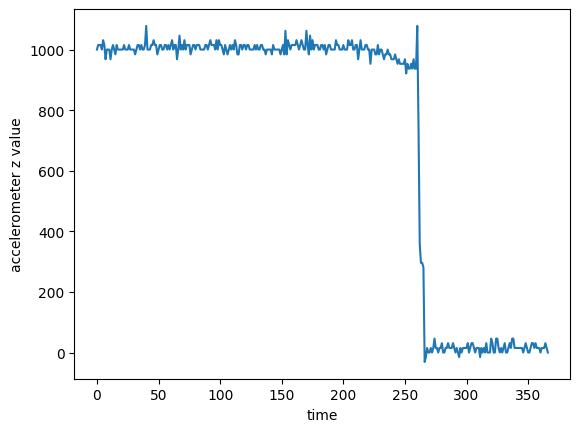

In [12]:
accelerometer_z_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    accelerometer_z = obs["accelerometer"]
    accelerometer_z_values.append(accelerometer_z)

plt.plot(accelerometer_z_values)
plt.xlabel("time")
plt.ylabel("accelerometer z value")

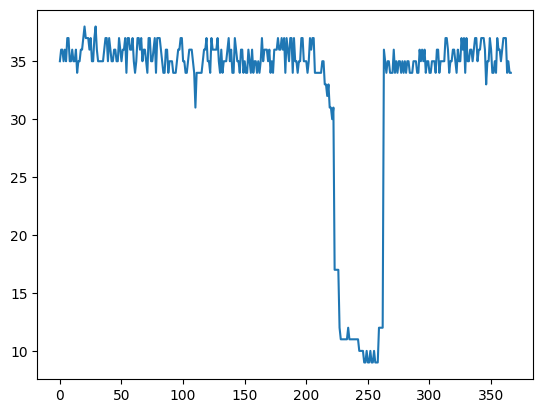

In [20]:
# read first index of fingertips
fingertips_values = []
for pickle_path in pickles:
    obs = pickle.load(open(os.path.join(demo_path, demo ,pickle_path),"rb"))
    fingertips = obs["fingertips"]
    fingertips_values.append(fingertips[1])

plt.plot(fingertips_values)